# Predicting Customer Churn with PyCaret: Boosting Business Performance

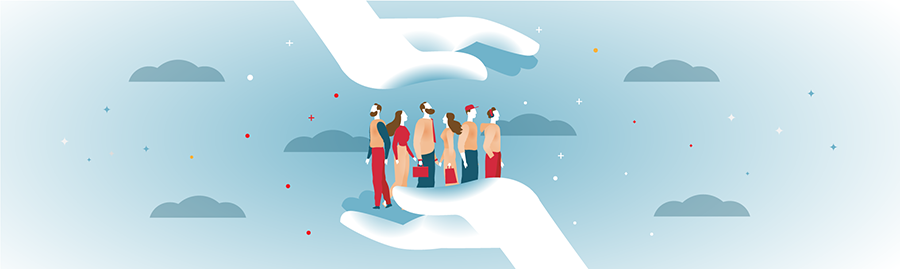

# Introduction

Are you curious about how companies can predict customer behavior and develop effective retention programs? Look no further than the world of customer churn analysis. This dataset from IBM includes information about customers who have recently left a company, as well as the services they signed up for, their account information, and demographic data. By analyzing this information, businesses can identify patterns and make informed decisions to retain their customers. Dive into this fascinating topic to explore the world of customer behavior prediction and retention strategies.

# Business Problem

"Identify customers at risk of churn and develop targeted retention strategies to reduce customer attrition rates and improve customer loyalty."

This problem is relevant for businesses in industries where customer churn is a common issue, such as telecommunications, subscription services, and financial services. By using data analysis and modeling techniques, businesses can gain insights into the factors that contribute to customer churn and develop proactive strategies to retain customers and improve overall business performance.

# Objectives

1. Develop a predictive model that can accurately identify customers who are likely to churn.
2. Determine which customer attributes have the strongest correlation with churn, and use this information to improve customer retention programs.
3. Identify patterns in the services that customers have signed up for, and use this information to optimize pricing and service offerings.
4. Develop customer personas based on demographic data, and use these personas to tailor marketing and communication strategies.
5. Identify opportunities to increase customer lifetime value, for example by promoting additional services or offering targeted incentives.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv


In [ ]:
%%capture
!pip install pycaret

In [2]:
from pycaret import classification
from setuptools import setup

In [3]:
from pycaret.classification import *

In [4]:
print(pycaret.__version__)

2.3.2


In [ ]:
%%capture
!pip freeze > requirements.txt

# Data Setup

In [5]:
churn_df = pd.read_csv('/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [6]:
churn_df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


# Set up the Environment

This step involves importing PyCaret and the necessary dataset, and initializing the environment using the setup() function. This function handles data preprocessing, feature engineering, and other important steps that prepare the data for modeling.

In [ ]:
%%capture
!pip install numba==0.53.1

In [ ]:
from distutils.core import setup

In [ ]:
import sys
sys.argv = [arg for arg in sys.argv if not arg.startswith("-f")]

In [7]:
churn_setup = setup(data = churn_df, target = 'Churn', session_id=123, ignore_features=['customerID'])

,Description,Value
0,session_id,123
1,Target,Churn
2,Target Type,Binary
3,Label Encoded,"No: 0, Yes: 1"
4,Original Data,"(7043, 21)"
5,Missing Values,False
6,Numeric Features,2
7,Categorical Features,17
8,Ordinal Features,False
9,High Cardinality Features,False


In [8]:
churn_setup

(False,
 Pipeline(memory=None, steps=[('empty_step', 'passthrough')], verbose=False),
 [],
 [],
 123,
 941     0
 1404    0
 5515    0
 3684    0
 7017    0
        ..
 4356    0
 5570    0
 2125    0
 5272    1
 5455    0
 Name: Churn, Length: 2113, dtype: int64,
 Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True,
                                       features_todrop=['customerID'],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='Churn',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
         

# Compare Models

Once the environment is set up, the compare_models() function is used to compare the performance of different machine learning models on the dataset.

In [9]:
compare_models(fold=5)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.8103,0.8512,0.5020,0.6838,0.5787,0.4600,0.4693,15.1340
gbc,Gradient Boosting Classifier,0.8093,0.8496,0.4957,0.6837,0.5742,0.4554,0.4655,11.8840
ada,Ada Boost Classifier,0.8069,0.8501,0.5278,0.6604,0.5865,0.4626,0.4676,3.9660
lr,Logistic Regression,0.8047,0.8452,0.5340,0.6509,0.5862,0.4601,0.4642,22.1760
ridge,Ridge Classifier,0.8008,0.0000,0.4988,0.6522,0.5648,0.4387,0.4456,1.3300
lightgbm,Light Gradient Boosting Machine,0.7959,0.8369,0.5090,0.6333,0.5642,0.4331,0.4376,1.4920
rf,Random Forest Classifier,0.7933,0.8228,0.4488,0.6476,0.5299,0.4029,0.4143,5.0400
xgboost,Extreme Gradient Boosting,0.7856,0.8226,0.4996,0.6052,0.5471,0.4084,0.4118,63.5780
et,Extra Trees Classifier,0.7811,0.8083,0.4402,0.6084,0.5106,0.3743,0.3826,7.7420
dt,Decision Tree Classifier,0.7771,0.6938,0.5184,0.5808,0.5470,0.3999,0.4016,0.4760


# Create a Model

After comparing different models, the create_model() function is used to create the model that will be used for making predictions. This function takes the name of the desired model as an argument.

In [21]:
cat_model=create_model('catboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8073,0.8299,0.4724,0.6818,0.5581,0.4401,0.4522
1,0.8235,0.8686,0.5547,0.7030,0.6201,0.5072,0.5133
2,0.8215,0.8739,0.5469,0.7000,0.6140,0.5002,0.5067
3,0.8195,0.8629,0.5312,0.7010,0.6044,0.4904,0.4983
4,0.7992,0.8414,0.5312,0.6355,0.5787,0.4483,0.4514
5,0.7708,0.8173,0.4453,0.5758,0.5022,0.3565,0.3614
6,0.8296,0.8722,0.5156,0.7500,0.6111,0.5068,0.5213
7,0.7911,0.8575,0.4609,0.6344,0.5339,0.4036,0.4122
8,0.7850,0.8227,0.4609,0.6146,0.5268,0.3913,0.3981
9,0.8377,0.8595,0.5312,0.7727,0.6296,0.5303,0.5455


# Tune the Model

To improve the performance of the model, the tune_model() function can be used to optimize the hyperparameters of the model.

In [22]:
tuned_cat_model=tune_model(cat_model, optimize = 'AUC')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8114,0.8301,0.4882,0.6889,0.5714,0.4550,0.4661
1,0.8235,0.8697,0.5547,0.7030,0.6201,0.5072,0.5133
2,0.8215,0.8720,0.5625,0.6923,0.6207,0.5056,0.5103
3,0.8114,0.8611,0.5156,0.6804,0.5867,0.4674,0.4750
4,0.8073,0.8420,0.5547,0.6514,0.5992,0.4734,0.4760
5,0.7789,0.8196,0.4531,0.5979,0.5156,0.3758,0.3819
6,0.8276,0.8756,0.5391,0.7263,0.6188,0.5106,0.5200
7,0.7890,0.8578,0.4688,0.6250,0.5357,0.4028,0.4098
8,0.7748,0.8221,0.4688,0.5825,0.5195,0.3747,0.3785
9,0.8256,0.8589,0.5078,0.7386,0.6019,0.4950,0.5093


# Plot Model Performance

The plot_model() function can be used to visualize the performance of the model on the training set.

### Area Under the Curve (AUC)

Area Under the Curve (AUC) - It is a measure of the overall performance of the model. The higher the AUC, the better the model is at predicting the outcome.

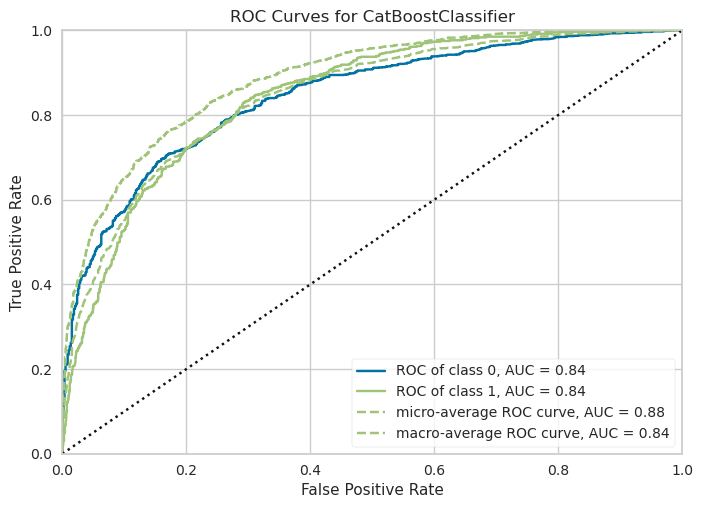

In [23]:
plot_model(tuned_cat_model, plot = 'auc')

### Precision-Recall Curve(pr)

Precision-Recall Curve - It is a plot that shows the trade-off between precision and recall for different probability thresholds in a binary classification problem.

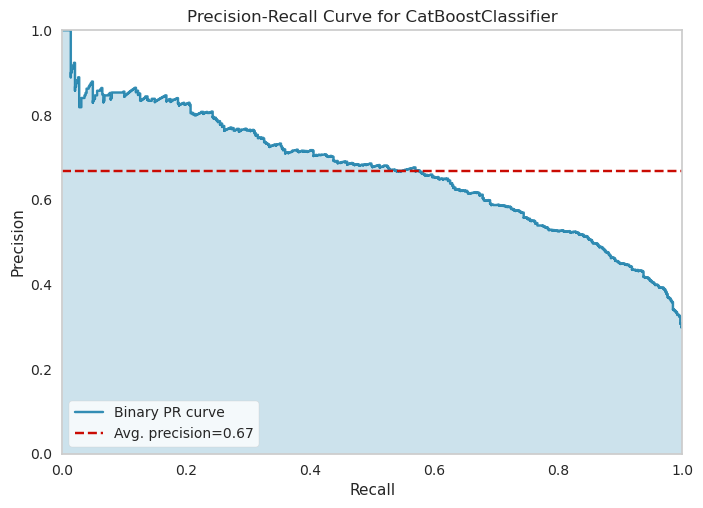

In [24]:
plot_model(tuned_cat_model, plot = 'pr')

### Decision Boundary 

Decision Boundary - It is a plot that shows the decision boundary of a model in a two-dimensional feature space.

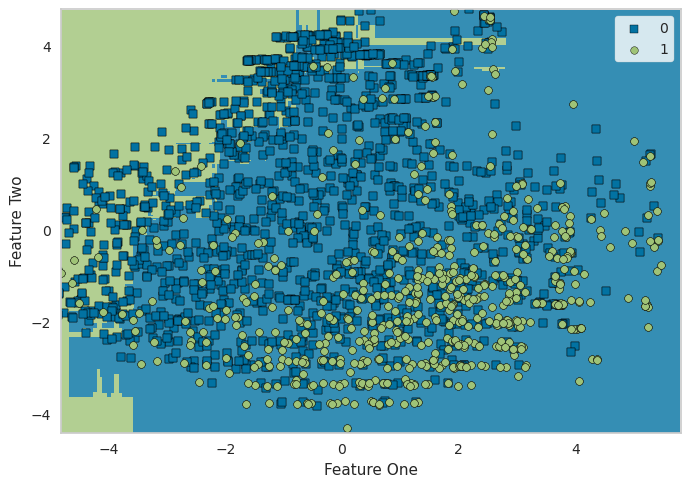

In [25]:
plot_model(tuned_cat_model, plot = 'boundary')

### Feature Importance

Feature Importance - It is a plot that shows the importance of each feature for a model.

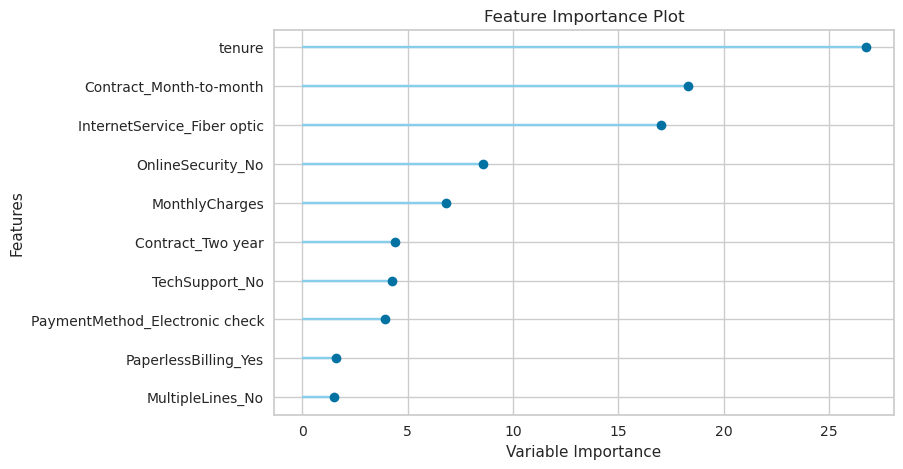

In [26]:
plot_model(tuned_cat_model, plot = 'feature')

### Confusion Matrix

Confusion Matrix - It is a table that shows the number of true positives, false positives, true negatives, and false negatives for a binary classification problem.

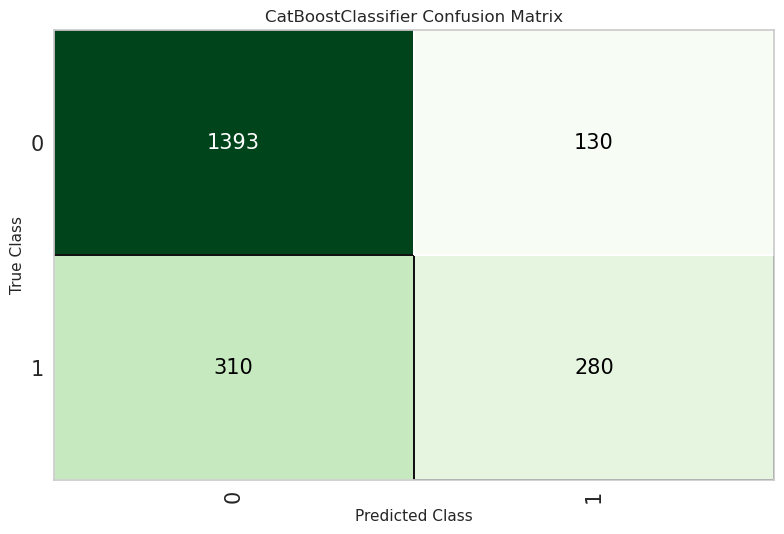

In [27]:
plot_model(tuned_cat_model, plot = 'confusion_matrix')

### Classification Report

Classification Report - It is a report that provides various classification metrics such as precision, recall, F1-score, and support for each class in a multi-class classification problem.

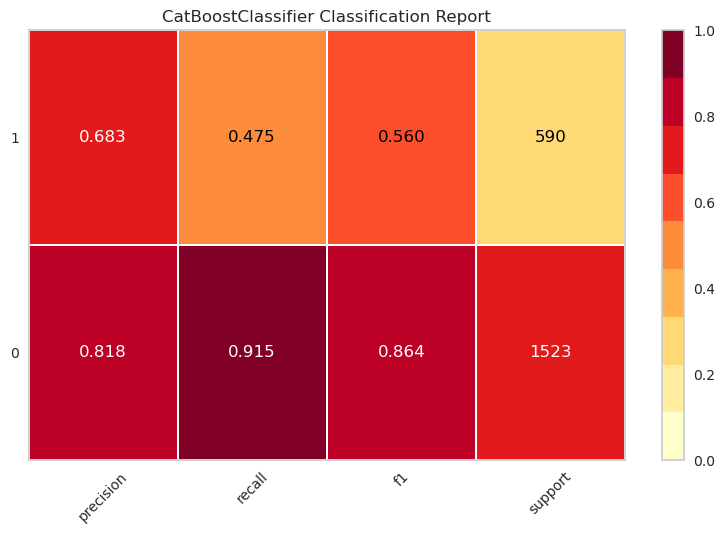

In [28]:
plot_model(tuned_cat_model, plot = 'class_report')

### Class Prediction Error

Class Prediction Error - It is a plot that shows the proportion of incorrect predictions for each class in a multi-class classification problem.

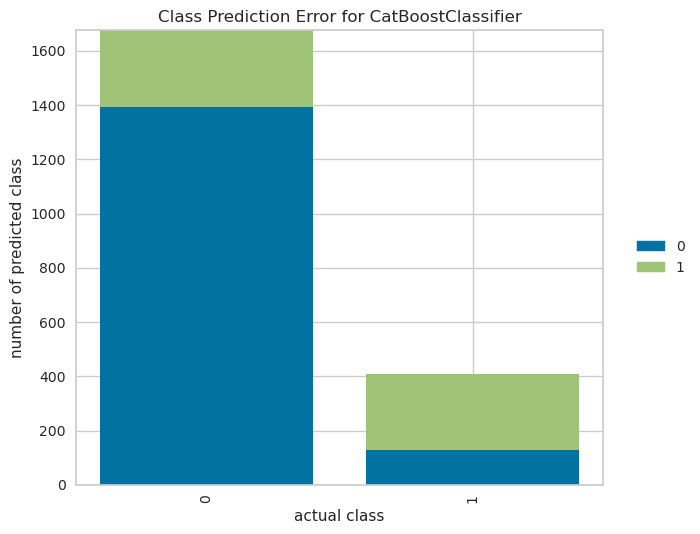

In [29]:
plot_model(tuned_cat_model, plot = 'error')

### Learning Curve

Learning Curve - It is a plot that shows the performance of the model on the training and validation sets for different sample sizes.

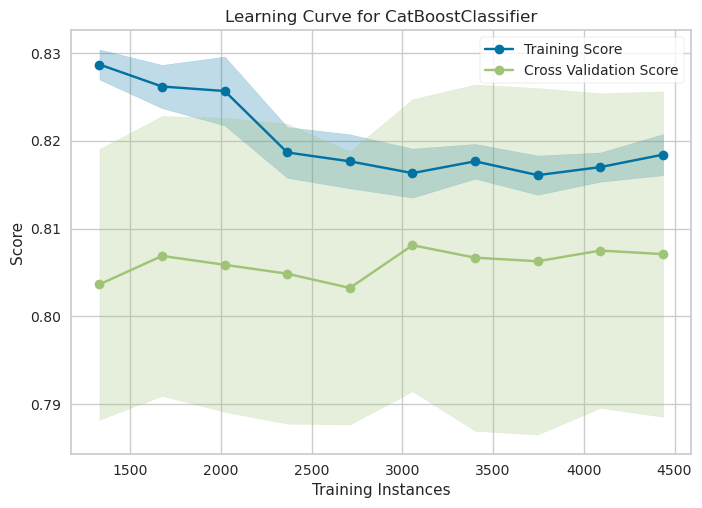

In [30]:
plot_model(tuned_cat_model, plot = 'learning')

### Validation Curve

Validation Curve - It is a plot that shows the performance of the model on the training and validation sets for different hyperparameter values.

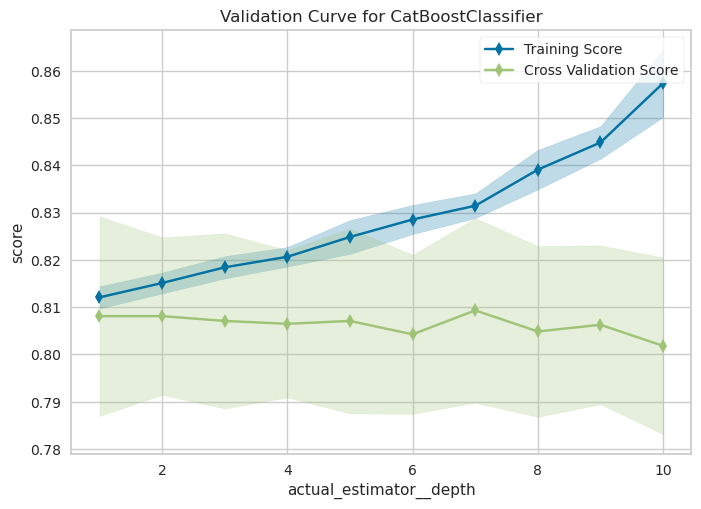

In [31]:
plot_model(tuned_cat_model, plot = 'vc')

### Model Hyperparameter

Model Hyperparameter - It is a plot that shows the performance of the model on the training and validation sets for different hyperparameter values.

In [32]:
plot_model(tuned_cat_model, plot = 'parameter')

,Parameters
nan_mode,Min
eval_metric,Logloss
iterations,250
sampling_frequency,PerTree
leaf_estimation_method,Newton
grow_policy,SymmetricTree
penalties_coefficient,1
boosting_type,Plain
model_shrink_mode,Constant
feature_border_type,GreedyLogSum


### KS Statistic Plot

KS Statistic Plot - It is a plot that shows the difference between the cumulative distribution function of the positive and negative classes in a binary classification problem.

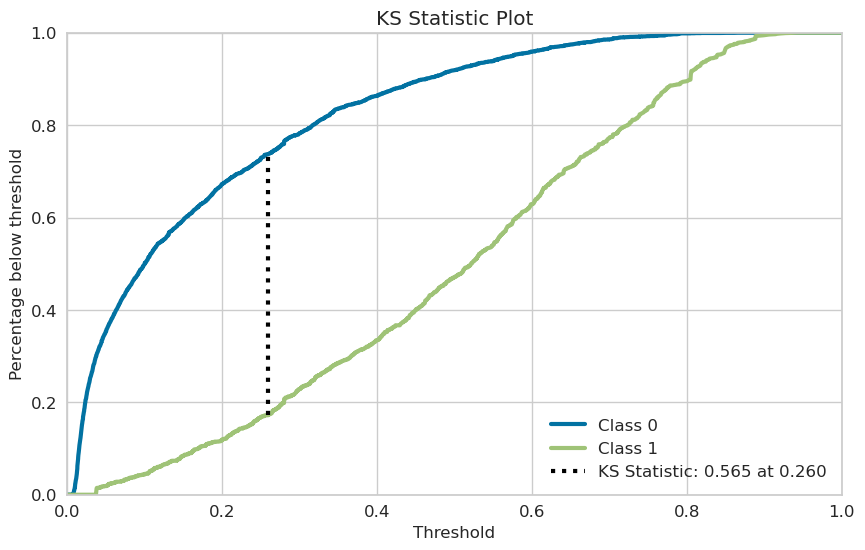

In [34]:
plot_model(tuned_cat_model, plot = 'ks')

# Evaluate Model

The evaluate_model() function is used to evaluate the performance of the model on the test set.

In [35]:
evaluate_model(tuned_cat_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

# Finalize Model

After the model has been evaluated, the finalize_model() function can be used to finalize the model for deployment.

In [37]:
final_cat = finalize_model(tuned_cat_model)

In [38]:
final_cat

# Predict Model

Finally, the predict_model() function is used to make predictions on new data using the finalized model.

In [39]:
predict_model(tuned_cat_model)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,CatBoost Classifier,0.7918,0.8443,0.4746,0.6829,0.5600,0.4293,0.4415


,tenure,MonthlyCharges,gender_Male,SeniorCitizen_1,Partner_No,Dependents_No,PhoneService_No,MultipleLines_No,MultipleLines_Yes,InternetService_DSL,...,TotalCharges_994.8,TotalCharges_996.85,TotalCharges_996.95,TotalCharges_997.75,TotalCharges_998.1,TotalCharges_999.45,TotalCharges_999.8,Churn,Label,Score
0,13.0,30.150000,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,No,0.7039
1,35.0,23.299999,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,No,0.9836
2,18.0,19.350000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,No,0.9813
3,43.0,75.349998,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,No,0.6892
4,51.0,20.650000,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,No,0.9857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2108,3.0,18.799999,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,No,0.8515
2109,37.0,95.150002,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,No,0.6041
2110,67.0,75.500000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,No,0.9451
2111,6.0,90.099998,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Yes,Yes,0.6683


# Save Model

In [40]:
save_model(tuned_cat_model,'cat_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True,
                                       features_todrop=['customerID'],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='Churn',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 nu...
                 ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                 ('cluster_all', 'passthrough'),
                 ('dummy', Dummify(target='Churn')),
                 ('fix_perfect', Remove_100(target='Churn'

In [41]:
!ls

/bin/bash: /opt/conda/lib/libtinfo.so.6: no version information available (required by /bin/bash)
Boruta-0.3-py3-none-any.whl
Flask-2.2.3-py3-none-any.whl
GitPython-3.1.30-py3-none-any.whl
ImageHash-4.3.1-py2.py3-none-any.whl
Jinja2-3.1.2-py3-none-any.whl
Mako-1.2.4-py3-none-any.whl
MarkupSafe-2.1.2-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl
Pillow-9.4.0-cp37-cp37m-manylinux_2_28_x86_64.whl
PyJWT-2.6.0-py3-none-any.whl
PyWavelets-1.3.0-cp37-cp37m-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_12_x86_64.manylinux2010_x86_64.whl
PyYAML-6.0-cp37-cp37m-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_12_x86_64.manylinux2010_x86_64.whl
Pygments-2.14.0-py3-none-any.whl
SQLAlchemy-1.4.46-cp37-cp37m-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl
Werkzeug-2.2.3-py3-none-any.whl
__notebook_source__.ipynb
alembic-1.9.3-py3-none-any.whl
attrs-22.2.0-py3-none-any.whl
backcall-0.2.0-py2.py3-none-any.whl
blis-0.7.9-cp37-cp37m-manylinux_2_17_

In [42]:
load_cat = load_model('cat_model')

Transformation Pipeline and Model Successfully Loaded


In [43]:
load_cat

Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True,
                                      features_todrop=['customerID'],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='Churn',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                nu...
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('cluster_all', 'passthrough'),
                ('dummy', Dummify(target='Churn')),
                ('fix_perfect', Remove_100(target='Churn')),
              

# Conclusion

Customer churn is a critical issue that can have a significant impact on a business's revenue and growth. By analyzing relevant customer data, businesses can develop targeted customer retention programs and improve customer satisfaction. The presented data set provides valuable information about customers who left within the last month, the services they signed up for, their account information, and demographic data. By applying machine learning algorithms to this data, businesses can predict customer churn and develop effective retention strategies. This type of model can not only help businesses retain their customers but also provide insights into customer behavior and preferences.